In [1]:
import numpy as np
from numpy import linalg as lin

def triad_census(matrix):
    
    A   = matrix
    n   = len(A) 
    At  = np.transpose(A)
    Ones = np.ones((n,n))

    X  = np.multiply(Ones-A,Ones-At)
    Y = np.multiply(A,At)
    Z  = np.multiply(A,Ones-At)
    Y2 = lin.matrix_power(Y,2)
    Y3 = lin.matrix_power(Y,3)
    
    B = np.dot(At,A) -np.dot(Y,A) -np.dot(At,Y) +lin.matrix_power(Y ,2)
    Bp = np.dot(A,At) -np.dot(Y,At) -np.dot(A,Y) +lin.matrix_power(Y ,2)
    C = lin.matrix_power(A ,2) -np.dot(Y,A) -np.dot(A,Y) +lin.matrix_power(Y ,2)
    D = np.dot(Y,At) -lin.matrix_power(Y ,2)
    E = np.dot(Y,A) -lin.matrix_power(Y ,2)

    t = np.zeros(13) 
# Triad 1
    P1 = np.multiply(X,B)
    t[0]  = (np.sum(P1)-np.trace(P1))/2   # t[0] is the count for triad 1, etc. 
# Triad 2
    P2 = np.multiply(X,Bp)
    t[1]  = (np.sum(P2)-np.trace(P2))/2  
# Triad 3
    P3 = np.multiply(X,C)
    t[2] = np.sum(P3)-np.trace(P3)
# Triad 4
    P4 = np.multiply(X,D)
    t[3] = np.sum(P4)-np.trace(P4)
# Triad 5
    P5 = np.multiply(X,E)
    t[4] = np.sum(P5)-np.trace(P5)
# Triad 6
    P6 = np.multiply(X,Y2)
    t[5] = (np.sum(P6)-np.trace(P6))/2
# Triad 7
    P7 = np.multiply(Z,C)
    t[6] = np.sum(P7)   
# Triad 8    
    t[7] = np.trace(lin.matrix_power(Z,3))/3   
# Triad 9
    P9 = np.multiply(Y,B)
    t[8] = np.sum(P9)/2
# Triad 10
    P10 = np.multiply(Y,Bp)
    t[9] = np.sum(P10)/2
# Triad 11   
    P11 = np.multiply(Y,C)
    t[10] = np.sum(P11)   
# Triad 12   
    P12 = np.multiply(Z,Y2)
    t[11] = np.sum(P12)
# Triad 13
    t[12] = np.trace(Y3)/6

    return t.astype(int)

In [3]:
# UNIX
! rm net_names.txt
#v1) ! ls database >> net_names.txt
! ls matrices >> net_names.txt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import pandas as pd

In [5]:
# NOTES
# The input file 'Fanconi anemia and checkpoint recovery.txt'
# was fixed manually, because the node 'DSB' is not formatted in a uniform way.

In [6]:
file = open('net_names.txt')
net_names = [name.rstrip() for name in file]

In [7]:
len(net_names)

71

In [8]:
profiles = []
for net_num in range(len(net_names)):
    matrix = np.loadtxt('matrices/'+net_names[net_num], dtype=int)
    n = len(matrix)
    for i in range(n):
        matrix[i,i] = 0 # removal of self-loops
    t = triad_census(matrix)
    profiles.append(list(t))

In [9]:
df = pd.DataFrame(profiles)
df.columns = ['t'+str(i) for i in range(1,14)]
#df['network'] = [(net_names[i].rstrip('_adjacency.txt')) for i in range(len(net_names))]
#df.set_index('network')
df.to_csv('triads_count.csv')

In [10]:
df.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,33,31,87,10,18,0,8,1,0,1,2,0,1
1,47,34,53,18,20,3,51,4,1,6,12,5,0
2,123,85,180,22,26,2,38,3,3,0,7,0,0
3,9,12,25,13,6,2,1,0,2,2,1,3,1
4,36,44,68,12,8,0,2,1,0,0,0,0,0


In [37]:
norm_df = df.div(df.sum(axis=1), axis=0) 

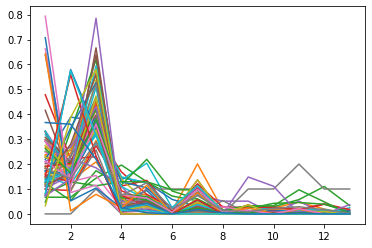

In [38]:
for i in range(len(norm_df)):
    pr = norm_df.loc[i]
    t = np.arange(1,14)
    plt.plot(t,pr)

In [83]:
data = [ list(norm_df['t'+str(i+1)]) for i in range(13) ]

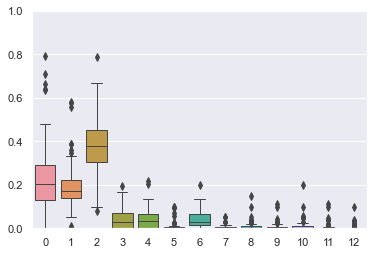

In [112]:
import seaborn as sns

seaborn.set(style='whitegrid')
fmri = seaborn.load_dataset("fmri")

sns.set(style="darkgrid")
sns.boxplot(data,notch=False, linewidth=1)
plt.ylim(0,1);

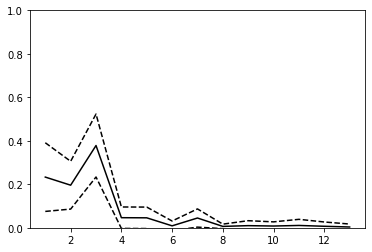

In [71]:
m = norm_df.mean()
s = norm_df.std()

plt.plot(t,m,'k')
plt.plot(t,m+s,'k--')
plt.plot(t,m-s,'k--')
plt.ylim(0,1);

In [24]:
df.mean(axis=1,numeric_only=True)

0     14.769231
1     19.538462
2     37.615385
3      5.923077
4     13.153846
        ...    
66    10.923077
67    74.538462
68     2.384615
69     5.615385
70    34.384615
Length: 71, dtype: float64

# Random

In [14]:
#random non symmetric with n, p
def random_adj_matrix(N,p):
    A = np.zeros((N,N), dtype=int)
    for i in range(N):
        for j in range(N):
            if rn.random() < p and i!=j:
                A[i][j] = 1
    return A

In [15]:
rand_profiles_mean = []
rand_profiles_std = []
ensemble_size = 100

for net_num in range(len(net_names)):
    ensemble = []

    matrix = np.loadtxt('matrices/'+net_names[net_num], dtype=int)
    n = len(matrix)
    for i in range(n):
        matrix[i,i] = 0 # removal of self-loops
    p = np.sum(matrix)/(n**2)

    for _ in range(ensemble_size):
        random_matrix = random_adj_matrix(n,p)
        t = list(triad_census(random_matrix))
        ensemble.append(t)

    m = np.mean(ensemble,axis = 0)
    s = np.std(ensemble,axis = 0)
    
    rand_profiles_mean.append(m)
    rand_profiles_std.append(s)
    
    print(net_num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


In [16]:
df_rand_mean = pd.DataFrame(rand_profiles_mean)
df_rand_std  = pd.DataFrame(rand_profiles_std)

In [17]:
result = np.zeros((len(df),13))

for i in range(len(df)):
    for j in range(13):
        
        tij = np.array(df)[i,j]
        rij = np.array(df_rand_mean)[i,j]
        sij = np.array(df_rand_std)[i,j]
        
        dij = tij - rij
        
        if(dij == 0 and sij == 0):
            result[i,j] = 1
        else:
            result[i,j] = dij/sij

<ipython-input-17-275d74438c9e>:15: RuntimeWarning: divide by zero encountered in double_scalars
  result[i,j] = dij/sij


In [18]:
df_result = pd.DataFrame(result)

In [19]:
df_result

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.474205,-1.597164,-0.649639,1.279062,3.248402,-0.239957,1.141147,-0.412717,-0.294884,3.000000,2.891399,-0.100504,inf
1,3.631661,1.434644,0.314662,-0.699141,-0.326657,-0.696705,2.826238,-0.984587,-1.815461,0.212320,0.270875,-0.015609,-0.484322
2,0.003841,-1.510913,-1.283660,1.050770,1.683293,2.200916,6.138657,-0.398562,4.053011,-0.498161,8.409862,-0.142857,1.000000
3,-1.685165,-1.091116,-1.243863,3.608730,0.861223,7.077214,-1.040071,-1.044074,4.644198,5.070399,1.021055,30.050631,inf
4,0.660421,1.331257,0.385037,1.581132,0.667646,-0.441836,-1.074383,-0.470871,-0.399475,-0.423547,-0.603267,-0.229416,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-0.586443,-1.528605,-1.088365,0.759419,0.466831,0.542218,1.929480,-0.547176,3.229168,-0.485247,2.600650,-0.229416,1.000000
67,0.043729,-1.431808,-1.340315,0.525038,2.974766,3.516588,0.476376,-0.972598,0.803442,5.567974,3.590732,7.382620,21.285714
68,-1.384656,1.501546,1.020257,-0.476149,-0.430594,-0.175863,-0.764964,-0.506972,-0.175863,-0.100504,-0.229416,1.000000,1.000000
69,-1.088085,4.609760,-0.245014,-0.050297,-0.087370,-0.142857,-0.727882,-0.466252,1.000000,-0.217072,-0.175863,1.000000,1.000000


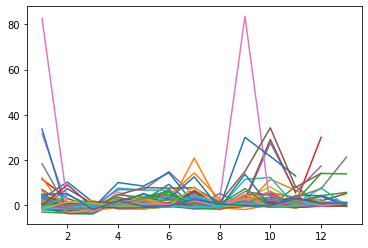

In [20]:
for i in range(len(df_result)):
    pr = np.array(df_result.loc[i])[:13]
    t = np.arange(1,14)
    plt.plot(t,pr)